In [1]:
import sys
import numpy as np
import random as rn
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [2]:
import pathlib
import seaborn as sns
sns.set_theme(style="whitegrid")
pathlib.Path().resolve()

WindowsPath('C:/Users/HackerByeBye/Documents/Therapy-Chatbot-Deploying-NLP/Training')

In [3]:
cnx = sqlite3.connect('../Scraping/Data/PTT_Gossip.db')
df = pd.read_sql_query("SELECT * FROM ArticlesWithReactions", cnx)
df

,date,author,category,title,content,comment_count,like_count,unlike_count,url
0,Tue Dec 6 18:11:11 2022,d86249 (金羊),Gossiping,真的有人因為教召被辭退的嗎?,國防部發新聞稿說明年2023會擴大辦理14天教召原本因為疫情或試辦只是一小部分人需要教召現在...,9,3,1,https://www.ptt.cc//bbs/Gossiping/M.1670321473...
1,Tue Dec 6 18:11:18 2022,DreamYeh (天使),Gossiping,希特勒是靠演講當到德國總理的嗎?,※ 引述《kikiki37 (441)》之銘言：: 對於外國歷史不太熟: 希特勒早年家境不好...,20,5,3,https://www.ptt.cc//bbs/Gossiping/M.1670321481...
2,Tue Dec 6 18:12:38 2022,lotudi (母湯仁~阿肥震傳~),Gossiping,心臟附近肌肉怪怪的有發炎的感覺?,心臟附近肌肉怪怪的有種發炎的感覺是心肌炎嗎？肥肥愛生氣也有點胖是不是芭比Q了？,19,6,2,https://www.ptt.cc//bbs/Gossiping/M.1670321560...
3,Tue Dec 6 18:12:41 2022,lovea (lovea),Gossiping,防止墜樓和浮S的方法??,在全台每棟大樓周圍都設置氣墊在愛河沿岸三步一崗五步一哨嚴禁有人靠近岸邊，並設置河面24hrs...,17,7,4,https://www.ptt.cc//bbs/Gossiping/M.1670321565...
4,Tue Dec 6 18:13:03 2022,lauwei (lauwei),Gossiping,內湖到新店再到信義區，順路嗎？,剛剛朋友氣死了原來他女友今天搭她主管的車回家女友說因為太冷捨不得他騎車去內湖接下班剛好主管住...,80,44,6,https://www.ptt.cc//bbs/Gossiping/M.1670321585...
...,...,...,...,...,...,...,...,...,...
69776,Wed Oct 5 15:37:14 2022,afiend0927 (飛輪爵士),Gossiping,"潛藏負債擴大至8,812億元 明年國保費率漲",※ 引述《Supergreen (Hi)》之銘言：: 1.媒體來源:: UDN: 2.記者署...,13,3,0,https://www.ptt.cc//bbs/Gossiping/M.1664955436...
69777,Wed Oct 5 15:38:00 2022,csghuuguh (ggininder),Gossiping,白俄證實參與俄烏戰爭 強調為阻止衝突蔓,備註請放最後面 違者新聞文章刪除1.媒體來源:TVBS新聞網2.記者署名:記者 俞璟瑤 報導...,47,29,0,https://www.ptt.cc//bbs/Gossiping/M.1664955482...
69778,Wed Oct 5 15:38:23 2022,nifa (沒有人),Gossiping,柯文哲嗆陳時中「去死」 綠委轟：為選舉,很好，那我們照民進党標準來聊聊2017/08/14表決到蔡英文滿意？ 台大教授：這跟威權時代...,15,10,2,https://www.ptt.cc//bbs/Gossiping/M.1664955508...
69779,Wed Oct 5 15:40:04 2022,qazStarStar (我不是派大星),Gossiping,不把統神國動寫進教科書? 交大國動陣線,周杰倫吳寶春這種等級的大師都進入國高中教材了為什麼統神國動不行國動還有個外號是鼻地大師跟統神...,7,4,1,https://www.ptt.cc//bbs/Gossiping/M.1664955606...


In [4]:
train_data = pd.read_csv('../train_PTT.csv')
train_data

,title,content,PosNeg,label
0,真的有人因為教召被辭退的嗎?,國防部發新聞稿說明年2023會擴大辦理14天教召原本因為疫情或試辦只是一小部分人需要教召現在...,1,['1']
1,希特勒是靠演講當到德國總理的嗎?,※ 引述《kikiki37 (441)》之銘言：: 對於外國歷史不太熟: 希特勒早年家境不好...,1,['1']
2,心臟附近肌肉怪怪的有發炎的感覺?,心臟附近肌肉怪怪的有種發炎的感覺是心肌炎嗎？肥肥愛生氣也有點胖是不是芭比Q了？,1,['1']
3,防止墜樓和浮S的方法??,在全台每棟大樓周圍都設置氣墊在愛河沿岸三步一崗五步一哨嚴禁有人靠近岸邊，並設置河面24hrs...,1,['1']
4,內湖到新店再到信義區，順路嗎？,剛剛朋友氣死了原來他女友今天搭她主管的車回家女友說因為太冷捨不得他騎車去內湖接下班剛好主管住...,3,['1']
...,...,...,...,...
52331,美中雙方暗中協議？,對美國而言，台灣是重要利益。對中國而言，台灣是核心利益。美國的重要利益無非就是台積電，或者說...,3,['4']
52332,日本中價位連鎖旅館哪一家比較好?,安安 本巨巨正在訂房 看了一堆 下意識的都跑去看APA 東橫這種不錯是不錯 便宜也便宜 但是...,1,['4']
52333,ptt沒落惹...,八卦版藍白文章推爆、執政黨噓爆每當覺得很穩了！投票時開中天看開票心情都變好了,2,['4']
52334,中國有戰爭準備嗎 ??,俄羅斯這次打烏克蘭被看破手腳中國如果要打台灣打的是海空戰 人海戰術沒什麼價值中國空軍或海軍真...,1,['4']


In [19]:
comment_and_sum_of_like = []
for x in range(df.shape[0]):
    X_value, Y_value = int(df['comment_count'][x]), int(df['like_count'][x])-int(df['unlike_count'][x])
    comment_and_sum_of_like.append([X_value, Y_value])
comment_and_sum_of_like

[[9, 2],
 [20, 2],
 [19, 4],
 [17, 3],
 [80, 38],
 [9, 0],
 [19, 5],
 [25, 2],
 [54, 19],
 [5, -1],
 [16, 7],
 [13, -2],
 [3, 2],
 [4, -3],
 [127, 34],
 [17, 5],
 [11, -2],
 [21, 6],
 [18, 11],
 [161, 84],
 [2, 1],
 [13, 4],
 [12, -3],
 [25, 6],
 [18, 5],
 [31, 11],
 [24, 5],
 [30, -4],
 [43, 11],
 [7, 4],
 [21, 1],
 [4, 1],
 [33, 3],
 [9, 3],
 [91, 14],
 [715, 411],
 [7, 2],
 [36, 5],
 [11, 3],
 [10, -2],
 [6, -1],
 [129, 46],
 [12, 2],
 [2, -1],
 [12, -5],
 [8, 1],
 [99, 10],
 [245, 118],
 [40, 21],
 [1, 0],
 [16, 5],
 [37, 6],
 [220, 90],
 [8, -1],
 [8, 4],
 [30, 9],
 [12, 3],
 [71, 20],
 [18, 5],
 [83, 38],
 [20, 4],
 [28, 2],
 [36, 16],
 [76, 40],
 [8, 3],
 [29, 5],
 [144, 81],
 [33, 14],
 [5, 0],
 [42, 20],
 [16, 10],
 [3, 1],
 [35, 17],
 [5, 1],
 [26, 9],
 [11, 4],
 [0, 0],
 [6, 0],
 [28, 9],
 [31, 4],
 [10, 1],
 [38, 12],
 [18, 3],
 [25, 14],
 [6, 0],
 [175, 73],
 [7, -1],
 [6, 0],
 [18, 9],
 [42, 5],
 [3, 0],
 [4, 2],
 [9, 5],
 [11, 3],
 [50, 17],
 [13, 6],
 [85, 41],
 [15, 3]

In [20]:
final_like = []
for x in range(df.shape[0]):
    final_like.append(int(df['like_count'][x])-int(df['unlike_count'][x]))

In [26]:
positive_or_negative = []
positive_or_negative_comment_count = []
for x in range(df.shape[0]):
    if int(df['like_count'][x]) > int(df['unlike_count'][x]):
        positive_or_negative.append("Positive")
        positive_or_negative_comment_count.append(df['comment_count'][x])
    elif int(df['like_count'][x]) < int(df['unlike_count'][x]):
        positive_or_negative.append("Negative")
        positive_or_negative_comment_count.append(df['comment_count'][x])
    else:
        positive_or_negative.append("Neutral")
        positive_or_negative_comment_count.append(df['comment_count'][x])

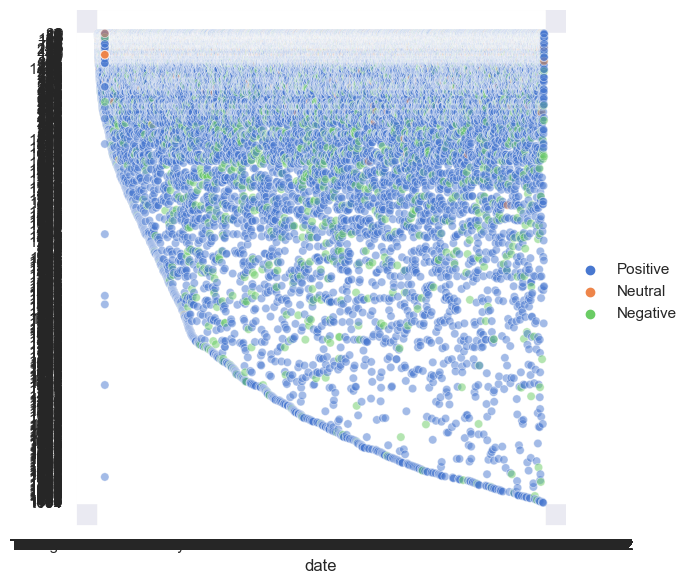

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.relplot(x="date", y=positive_or_negative_comment_count, hue=positive_or_negative,
            sizes=(40, 40000), alpha=.5, palette="muted",
            height=6, data=df)

In [31]:
import torch
print(torch.__version__)

print(torch.version.cuda)
print(torch.backends.cudnn.version())

C:\Users\HackerByeBye\Anaconda3\envs\Awesome\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.13.0
11.7
8500


In [38]:
import keras_preprocessing
keras_preprocessing.__version__

'1.1.2'

In [46]:
import jieba
import jieba.posseg as pseg
def jiebaSlice(content,mode):
    stopword_set = []
    content = str(content)
    with open('../stopword.txt','r', encoding='utf-8') as stopwords:
        for stopword in stopwords:
            stopword_set.append(stopword.strip('\n'))
    
    content = content.strip('\n')
    if mode == "POSSEG":
        words = pseg.cut(content,use_paddle=True)
        slicedWords = []
        for word, flag in words:
            if word not in stopword_set:
                slicedWords.append(word)
        return slicedWords
    elif mode == "CUT_HMM":
        seg_list = jieba.cut(content,HMM=True,cut_all=True)
        slicedWords = list(seg_list)
        return slicedWords
    elif mode == "CUT_FOR_SEARCH":
        seg_list = jieba.cut_for_search(content,HMM=True)
        slicedWords = list(seg_list)
        return slicedWords
    elif mode == "NORMAL":
        seg_list = jieba.cut_for_search(content)
        slicedWords = list(seg_list)
        return slicedWords  

In [52]:
TEMP = jiebaSlice(df['content'][0],'CUT_HMM')
TEMP

['國',
 '防部',
 '發',
 '新',
 '聞',
 '稿',
 '說',
 '明年',
 '2023',
 '會',
 '擴',
 '大',
 '辦',
 '理',
 '14',
 '天',
 '教',
 '召',
 '原本',
 '因',
 '為',
 '疫情',
 '或',
 '試',
 '辦',
 '只是',
 '一小',
 '一小部分',
 '小部',
 '部分',
 '人',
 '需要',
 '教',
 '召',
 '現',
 '在',
 '疫情',
 '趨',
 '緩',
 '、',
 '大家',
 '都',
 '有',
 '打',
 '疫苗',
 '的',
 '情',
 '況',
 '下',
 '可能',
 '避免',
 '免不了',
 '不了',
 '了了',
 '八卦',
 '版',
 '跟',
 '現',
 '實',
 '彷',
 '彿',
 '是',
 '台',
 '灣',
 '兩',
 '個',
 '不同',
 '平行',
 '世界',
 '照理',
 '來',
 '說',
 '台',
 '灣',
 '應',
 '該',
 '是',
 '貫',
 '老',
 '闆',
 '盛行',
 '你',
 '去',
 '教',
 '召',
 '老',
 '闆',
 '不可',
 '可能',
 '給',
 '你',
 '兩',
 '個',
 '禮',
 '拜',
 '的',
 '不',
 '扣薪',
 '公假',
 '真的',
 '不',
 '會',
 '有人',
 '因',
 '為',
 '教',
 '召',
 '而',
 '失',
 '業',
 '嗎',
 '?',
 '除非',
 '是',
 '一些',
 '大公',
 '公司',
 '礙',
 '於',
 '名',
 '聲',
 '或是',
 '公司',
 '是',
 '擁',
 '有',
 '列入',
 '緩',
 '召',
 '名',
 '單',
 '內',
 '真的',
 '很',
 '好奇']

In [48]:
jiebaSlice(df['content'][0],'POSSEG')

['國',
 '防部',
 '發新',
 '聞',
 '稿',
 '說',
 '明年',
 '2023',
 '會',
 '擴大',
 '辦理',
 '14',
 '天教',
 '召',
 '原本',
 '因為',
 '疫情',
 '或',
 '試辦',
 '只是',
 '一小部分',
 '人',
 '需要',
 '教',
 '召現',
 '在',
 '疫情',
 '趨緩',
 '大家',
 '有',
 '打',
 '疫苗',
 '情況',
 '下',
 '可能',
 '避免',
 '不了',
 '八卦',
 '版',
 '跟',
 '現實',
 '彷彿',
 '台',
 '灣',
 '兩',
 '個',
 '不同',
 '平行',
 '世界',
 '照理',
 '來',
 '說',
 '台灣',
 '應該',
 '貫',
 '老',
 '闆',
 '盛行',
 '你',
 '去',
 '教',
 '召',
 '老',
 '闆',
 '不',
 '可能',
 '給',
 '你',
 '兩個',
 '禮',
 '拜',
 '不',
 '扣薪',
 '公假',
 '真的',
 '不',
 '會',
 '有人',
 '因為',
 '教召',
 '失業',
 '嗎',
 '除非',
 '一些',
 '大',
 '公司',
 '礙',
 '於',
 '名聲',
 '或是',
 '公司',
 '擁有',
 '列入',
 '緩召',
 '名單',
 '內',
 '真的',
 '很',
 '好奇']

In [49]:
jiebaSlice(df['content'][0],'CUT_FOR_SEARCH')

['國',
 '防部',
 '發新聞',
 '稿',
 '說',
 '明年',
 '2023',
 '會',
 '擴大',
 '辦理',
 '14',
 '天教召',
 '原本',
 '因為',
 '疫情',
 '或',
 '試辦',
 '只是',
 '一小',
 '小部',
 '部分',
 '一小部分',
 '人',
 '需要',
 '教召現',
 '在',
 '疫情',
 '趨緩',
 '、',
 '大家',
 '都',
 '有',
 '打',
 '疫苗',
 '的',
 '情況',
 '下',
 '可能',
 '避免',
 '不了',
 '了',
 '八卦',
 '版',
 '跟',
 '現實',
 '彷',
 '彿',
 '是',
 '台灣',
 '兩個',
 '不同',
 '平行',
 '世界',
 '照理',
 '來',
 '說',
 '台灣',
 '應該',
 '是',
 '貫老',
 '闆',
 '盛行',
 '你',
 '去',
 '教召',
 '老',
 '闆',
 '不',
 '可能',
 '給你',
 '兩個',
 '禮拜',
 '的',
 '不',
 '扣薪',
 '公假',
 '真的',
 '不會',
 '有人',
 '因為',
 '教召',
 '而',
 '失業',
 '嗎',
 '?',
 '除非',
 '是',
 '一些',
 '大',
 '公司',
 '礙',
 '於',
 '名聲',
 '或是',
 '公司',
 '是',
 '擁有',
 '列入',
 '緩召名',
 '單內',
 '真的',
 '很',
 '好奇']

In [50]:
jiebaSlice(df['content'][0],'NORMAL')

['國',
 '防部',
 '發新聞',
 '稿',
 '說',
 '明年',
 '2023',
 '會',
 '擴大',
 '辦理',
 '14',
 '天教召',
 '原本',
 '因為',
 '疫情',
 '或',
 '試辦',
 '只是',
 '一小',
 '小部',
 '部分',
 '一小部分',
 '人',
 '需要',
 '教召現',
 '在',
 '疫情',
 '趨緩',
 '、',
 '大家',
 '都',
 '有',
 '打',
 '疫苗',
 '的',
 '情況',
 '下',
 '可能',
 '避免',
 '不了',
 '了',
 '八卦',
 '版',
 '跟',
 '現實',
 '彷',
 '彿',
 '是',
 '台灣',
 '兩個',
 '不同',
 '平行',
 '世界',
 '照理',
 '來',
 '說',
 '台灣',
 '應該',
 '是',
 '貫老',
 '闆',
 '盛行',
 '你',
 '去',
 '教召',
 '老',
 '闆',
 '不',
 '可能',
 '給你',
 '兩個',
 '禮拜',
 '的',
 '不',
 '扣薪',
 '公假',
 '真的',
 '不會',
 '有人',
 '因為',
 '教召',
 '而',
 '失業',
 '嗎',
 '?',
 '除非',
 '是',
 '一些',
 '大',
 '公司',
 '礙',
 '於',
 '名聲',
 '或是',
 '公司',
 '是',
 '擁有',
 '列入',
 '緩召名',
 '單內',
 '真的',
 '很',
 '好奇']

In [51]:
df['content'][0]

'國防部發新聞稿說明年2023會擴大辦理14天教召原本因為疫情或試辦只是一小部分人需要教召現在疫情趨緩、大家都有打疫苗的情況下可能避免不了了八卦版跟現實彷彿是台灣兩個不同平行世界照理來說台灣應該是貫老闆盛行你去教召老闆不可能給你兩個禮拜的不扣薪公假真的不會有人因為教召而失業嗎?除非是一些大公司礙於名聲或是公司是擁有列入緩召名單內真的很好奇'

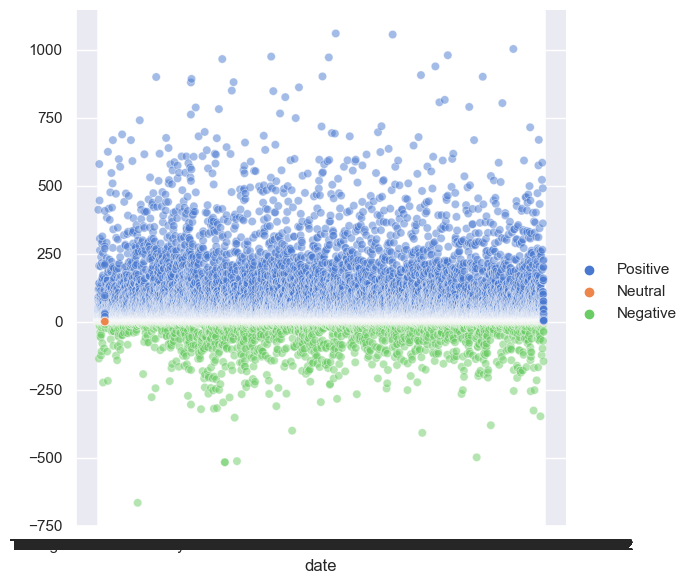

In [54]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.relplot(x="date", y=final_like, hue=positive_or_negative,
            sizes=(40, 40000), alpha=.5, palette="muted",
            height=6, data=df)